<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# *Mini Project 2*
By: Stephanie Nduaguba

## Instruction

The purpose of the Mini Project is to reinforce skills that have been covered in recent modules.

A. Find a dataset with some missing values and perform EDA:

- Use Logistic Regression, SVC and Bayes    

B. Things to consider:

- Can be either a binary classification or multiclassification
- Confusion matrix
- Score and interpretability with LIME for one model (the best prediction model)
    
C. Discuss the outputs.

D. Optional:
- Cross validation
- GridSearch

## Dataset Description
The dataset used for the Mini Project 2 is sourced from a credit scoring dataset made available by the Polytechnic University of Catalonia via their data mining course - [Polytechnic University of Catalonia Data Mining Course](https://www.cs.upc.edu/~belanche/Docencia/mineria/mineria.html).

This dataset provides information about customers, including attributes such as seniority, age, marital status, income, and other relevant characteristics. Additionally, it includes details about loans, specifically the requested loan amount and the item's price, along with the loan status (whether it was repaid or not). 

While a majority of the dataset's columns consist of numerical data, several categorical features include 'status,' 'home,' 'marital status,' 'records,' and 'job.' However, to make this data more interpretable, a slight transformation will be performed on the categorical values by translating them into their corresponding actual names.

A copy of this dataset is available on GitHub - [GitHub Credit Scoring Dataset](https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv).

## Data Objective

1. **Has Missing Values?** Yes, while not immediately evident in the dataset, it's important to note that missing values have been encoded as discrete values within certain columns.

2. **Suitable for Binary Classification?** Yes, this dataset is well-suited for binary classification tasks.


## Dataset Attribute

Below is a description of the dataset's columns and their corresponding values:
    
    status: whether the customer managed to pay back the loan (1) or not (2), missing (0). Target variable
    seniority: job experience in years
    home: type of homeownership: rent (1), owner (2), private (3), ignore (4), parents (5), other (6)
    time: period planned for the loan (in months)
    age: age of the customer
    marital [status]: single (1), married (2), widow (3), separated (4), divorced (5), missing (0)
    records: whether the customer has any previous records: no (1), yes (2) (It’s not clear from the dataset description what kind of records we have in this column. For the purposes of this project, an assumption is made that it’s about records in the bank’s database.)
    job: type of job: fixed (1), parttime (2), freelance (3), others (4), missing (0)
    expenses: how much the customer spends per month
    income: how much the customer earns per month. Missing values are encoded as "99999999" 
    assets: total worth of all the assets of the customer. Missing values are encoded as "99999999" 
    debt: amount of credit debt. Missing values are encoded as "99999999"
    amount: requested amount of the loan
    price: price of an item the customer wants to buy
    
**Source:** *Machine Learning Bookcamp: Build a Portfolio of Real-life Projects (Final release) by Alexey Grigorev*

### Data Import & Cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

%matplotlib inline

In [2]:
# Load and view data
CreditScoring = "https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv"

df = pd.read_csv(CreditScoring)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [3]:
# Dataset info to view datatypes and check for apparent missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


No apparent missing values are seen. However, as noted in the dataset attributes section, the missing values within this dataset are encoded. To ensure accurate analysis, a standardized approach will be employed: 

- missing values of numerical and categorical features will be coded as 'NaN'(Not a Number)

Furthermore, it's important to note that certain categorical features, including Status, Home, Marital, Records, and Job, are currently represented as int64 datatypes. This is because their values have been encoded as numerical data. To convert these datatypes to object datatypes, we will translate these numerical values back to their corresponding actual names.

In [4]:
# Define the value mappings for categorical features
value_mappings = {
    'Status': {1: 'ok', 2: 'default', 0: np.nan},
    'Home': {1: 'rent', 2: 'owner', 3: 'private', 4: np.nan, 5: 'parents', 6: 'other', 0: np.nan},
    'Marital': {1: 'single', 2: 'married', 3: 'widow', 4: 'separated', 5: 'divorced', 0: np.nan},
    'Records': {1: 'no', 2: 'yes', 0: np.nan},
    'Job': {1: 'fixed', 2: 'parttime', 3: 'freelance', 4: 'others', 0: np.nan}
}

# Use a loop to apply value mappings to the DataFrame
for column, mapping in value_mappings.items():
    df[column] = df[column].map(mapping)

In [5]:
# View first 5 rows to confirm categorical data transformation
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
# View datatypes to confirm change to the datatype of the categorical features
df.dtypes

Status       object
Seniority     int64
Home         object
Time          int64
Age           int64
Marital      object
Records      object
Job          object
Expenses      int64
Income        int64
Assets        int64
Debt          int64
Amount        int64
Price         int64
dtype: object

In [7]:
# Numerical columns summary statistics
df.describe().round(2).T # Rounded the results so to get rid of the values in scientific notation

,count,mean,std,min,25%,50%,75%,max
Seniority,4455.0,7.99,8.17,0.0,2.0,5.0,12.0,48.0
Time,4455.0,46.44,14.66,6.0,36.0,48.0,60.0,72.0
Age,4455.0,37.08,10.98,18.0,28.0,36.0,45.0,68.0
Expenses,4455.0,55.57,19.52,35.0,35.0,51.0,72.0,180.0
Income,4455.0,763316.99,8703625.26,0.0,80.0,120.0,166.0,99999999.0
Assets,4455.0,1060340.81,10217568.67,0.0,0.0,3500.0,6000.0,99999999.0
Debt,4455.0,404381.96,6344253.40,0.0,0.0,0.0,0.0,99999999.0
Amount,4455.0,1039.02,474.54,100.0,700.0,1000.0,1300.0,5000.0
Price,4455.0,1462.88,628.09,105.0,1117.5,1400.0,1692.0,11140.0


In [8]:
# Replace missing numerical values '99999999' with NaN
for c in ['Income', 'Assets', 'Debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [9]:
# Confirm missing numerical values have been replaced
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Seniority,4455.0,7.99,8.17,0.0,2.0,5.0,12.0,48.0
Time,4455.0,46.44,14.66,6.0,36.0,48.0,60.0,72.0
Age,4455.0,37.08,10.98,18.0,28.0,36.0,45.0,68.0
Expenses,4455.0,55.57,19.52,35.0,35.0,51.0,72.0,180.0
Income,4421.0,130.57,86.37,0.0,80.0,120.0,165.0,959.0
Assets,4408.0,5403.43,11573.16,0.0,0.0,3000.0,6000.0,300000.0
Debt,4437.0,342.95,1245.86,0.0,0.0,0.0,0.0,30000.0
Amount,4455.0,1039.02,474.54,100.0,700.0,1000.0,1300.0,5000.0
Price,4455.0,1462.88,628.09,105.0,1117.5,1400.0,1692.0,11140.0


In [10]:
# Count of missing values in all columns
missing_count = df.isnull().sum().sort_values(ascending=True)
missing_count

Seniority     0
Time          0
Age           0
Records       0
Expenses      0
Amount        0
Price         0
Status        1
Marital       1
Job           2
Debt         18
Home         26
Income       34
Assets       47
dtype: int64

In [11]:
# Percentage of missing values in each column to determine treatment for modeling
missing_percentage = df.isnull().sum()/len(df) * 100
missing_percentage_columns = missing_percentage[missing_percentage > 0].sort_values(ascending=True)
missing_percentage_columns

Status     0.022447
Marital    0.022447
Job        0.044893
Debt       0.404040
Home       0.583614
Income     0.763187
Assets     1.054994
dtype: float64

In [12]:
# Total percent of rows with missing value in dataset
df.isna().any(axis=1).sum()/len(df) * 100

2.244668911335578

The decision to drop rows with missing data is made since the quantity is negligible (only approx. 2%), thereby preserving data integrity.

In [13]:
# Rows and column count of the original data
df.shape

(4455, 14)

In [14]:
# Dropping rows with missing data
df.dropna(axis=0, how='any', inplace=True)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90.0,3500.0,0.0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


### Exploratory Data Analysis (EDA)

In [15]:
# Convert the target variable to numbers 0 for 'ok' and 1 for 'default'
df['Status'] = (df['Status'] == 'default').astype(int)
df['Status'].head()

0    0
1    0
2    1
3    0
4    0
Name: Status, dtype: int64

In [16]:
# Check the distribution of values in the target variable
df['Status'].value_counts()

0    3148
1    1207
Name: Status, dtype: int64

In [17]:
# Calculate default rate among customers in the dataset. This will be used later in the risk ratio calculation.
default_rate = df['Status'].mean()
default_rate

0.27715269804822046

In [18]:
# Column headers
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [19]:
# Define the categorical and numerical variables
categorical = ['Home', 'Marital', 'Records', 'Job']

numerical = ['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']

In [20]:
# Count of unique values in the categorical variables
df[categorical].nunique()

Home       5
Marital    5
Records    2
Job        4
dtype: int64

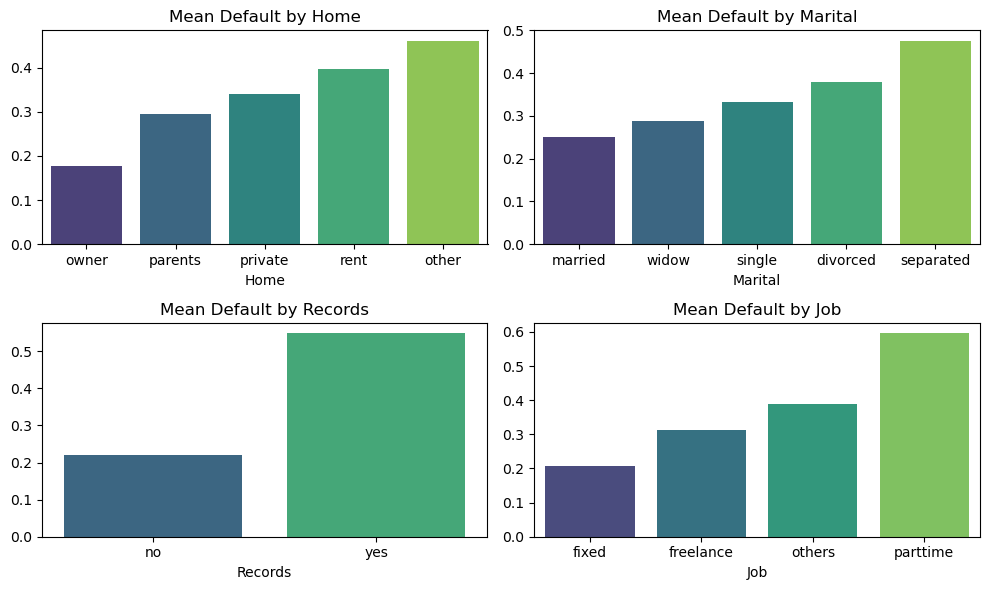

In [21]:
# Calculate and plot the mean default rate within the categorical variables
# Create a 2x2 subplot for the four plots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Iterate through the categorical variables and plot mean 'Status' (default)
for i, value in enumerate(categorical):
    mean_values = df.groupby(value)['Status'].mean().sort_values()
    sns.barplot(x=mean_values.index, y=mean_values.values, palette="viridis", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Mean Default by {value}')
    axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels())

# Adjust the layout
plt.tight_layout()
plt.show()

Summary of Categorical Feature Analysis: The analysis shows that individuals categorized as owner-occupied show the lowest default rate in comparison to other home variables. Furthermore, those who are separated or divorced exhibit the highest default rates. Customers with a history of records at the bank were over twice as likely to default when compared to those who had no prior relationship with the credit provider. Finally, a notable correlation is observed between fixed/full-time employment and a reduced tendency to default.

In [22]:
# Risk ratio to measure the likehood of default within a group
# If the rate is greater than 1, the group is considered high-risk, indicating a higher default rate within the group compared to the overall sample dataset population
for col in categorical:
    df_group = df.groupby(by=col).Status.agg(['mean'])
    df_group['diff'] = df_group['mean'] - default_rate
    df_group['rate'] = df_group['mean'] / default_rate
    display(df_group)

,mean,diff,rate
Home,,,
other,0.461783,0.184631,1.666170
owner,0.178295,-0.098858,0.643308
parents,0.296248,0.019096,1.068900
private,0.340249,0.063096,1.227659
rent,0.397715,0.120563,1.435005


,mean,diff,rate
Marital,,,
divorced,0.378378,0.101226,1.365234
married,0.251340,-0.025812,0.906866
separated,0.476190,0.199038,1.718152
single,0.331937,0.054784,1.197669
widow,0.287879,0.010726,1.038701


,mean,diff,rate
Records,,,
no,0.220527,-0.056626,0.795688
yes,0.549333,0.272181,1.982060


,mean,diff,rate
Job,,,
fixed,0.206710,-0.070443,0.745834
freelance,0.313142,0.035989,1.129853
others,0.387879,0.110726,1.399513
parttime,0.596847,0.319694,2.153495


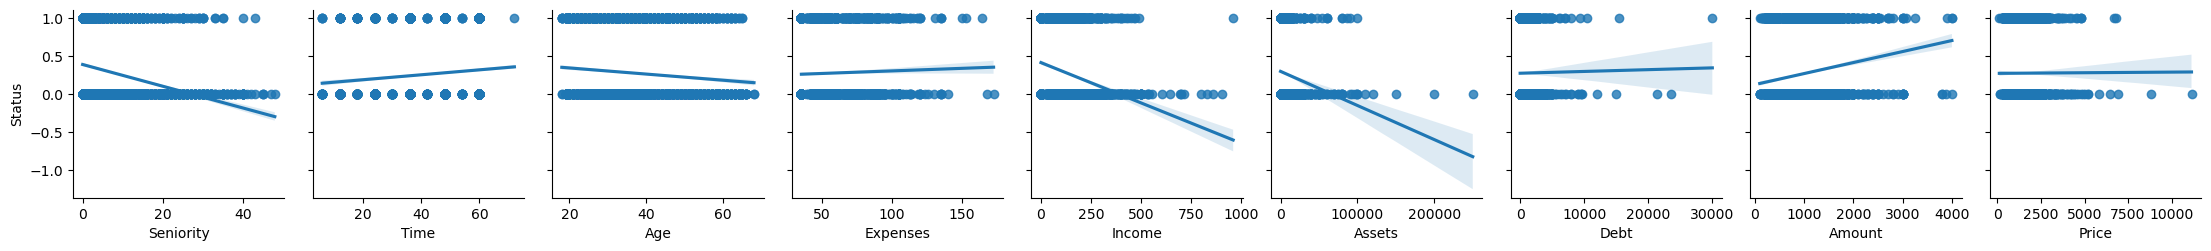

In [23]:
# Pairplot of numerical variables with status
sns.pairplot(df, y_vars='Status', x_vars=numerical, kind='reg');

In [24]:
# Correlation coefficient of numerical variables with the target variable 'Status'
df_corr = df[numerical].corrwith(df['Status']).sort_values(ascending=True)
df_corr

Seniority   -0.261863
Income      -0.205161
Assets      -0.106678
Age         -0.099424
Price        0.002269
Debt         0.006433
Expenses     0.029282
Time         0.106735
Amount       0.151781
dtype: float64

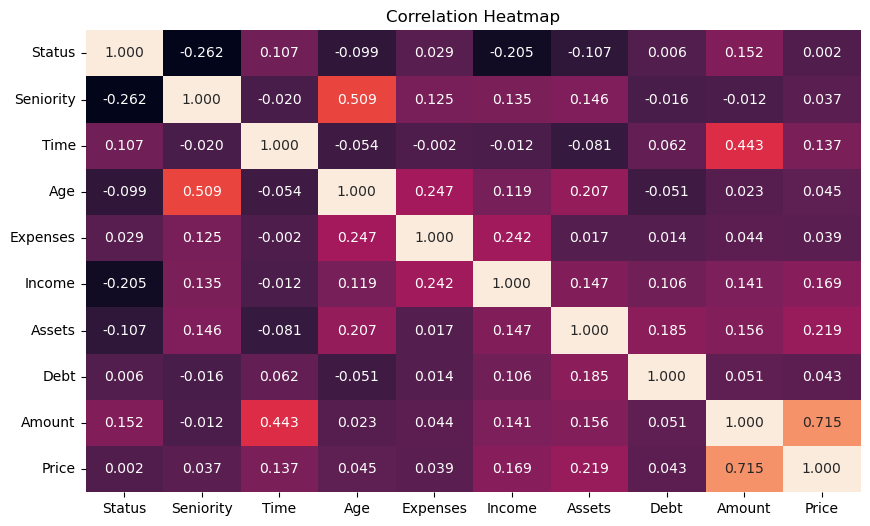

In [25]:
# Heatmap of correlation coefficient 
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f", cbar=False)
plt.title("Correlation Heatmap")
plt.show()

An inverse correlation is seen between seniority and status, suggesting that individuals who remain in their jobs potentially earn more, thereby improving their ability to manage credit. Conversely, an increase in the loan amount is associated with a high likelihood of loan default. Price and debt show almost no correlation with status, indicating that these factors have no discernible impact on a customer's likelihood to default on a loan.

### Feature Engineering

In [26]:
# Column headers
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [27]:
# Target variable
y = df['Status']

In [28]:
# Using DictVectorizer from Scikit-learn to perform one-hot encoding 
dv = DictVectorizer(sparse=False)

# Predictor variables
X = dv.fit_transform(df[categorical + numerical].to_dict(orient='records'))

In [29]:
# View new feature names
dv.feature_names_

['Age',
 'Amount',
 'Assets',
 'Debt',
 'Expenses',
 'Home=other',
 'Home=owner',
 'Home=parents',
 'Home=private',
 'Home=rent',
 'Income',
 'Job=fixed',
 'Job=freelance',
 'Job=others',
 'Job=parttime',
 'Marital=divorced',
 'Marital=married',
 'Marital=separated',
 'Marital=single',
 'Marital=widow',
 'Price',
 'Records=no',
 'Records=yes',
 'Seniority',
 'Time']

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Check shape of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(3484, 25)
(3484,)


In [32]:
# Check shape of X_test and y_test
print(X_test.shape)
print(y_test.shape)

(871, 25)
(871,)


### Machine Learning Models

#### Logistic Regression Model

Training Accuracy: 0.8119977037887486
Testing Accuracy: 0.8025258323765786


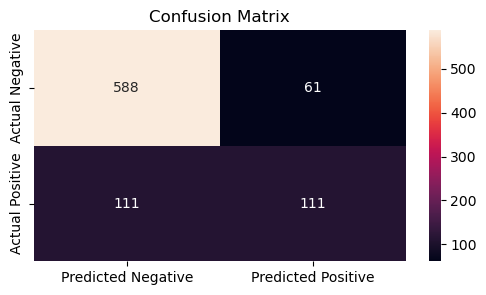

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       649
           1       0.65      0.50      0.56       222

    accuracy                           0.80       871
   macro avg       0.74      0.70      0.72       871
weighted avg       0.79      0.80      0.79       871



In [33]:
# Apply LogisticRegression model
logreg = LogisticRegression(solver='liblinear') # Liblinear solver as it works best with binary classification and imbalanced datasets

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model on the training data
train_pred_lr = logreg.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, train_pred_lr)

# Evaluate the model on the testing data
test_pred_lr = logreg.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, test_pred_lr)

# Print accuracy scores
print('Training Accuracy:', train_accuracy_lr)
print('Testing Accuracy:', test_accuracy_lr)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred_lr)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['Predicted Negative', 'Predicted Positive'],
           yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, test_pred_lr)
print("Classification report:\n", report)

#### Support Vector Machine (SVM)

Training Accuracy: 0.7175660160734788
Testing Accuracy: 0.7451205510907003


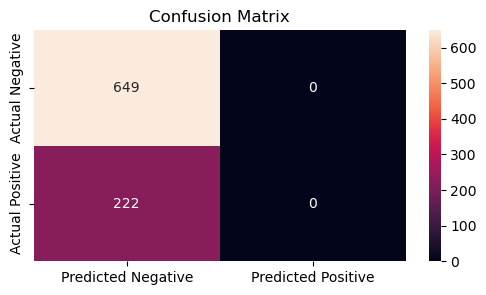

Classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85       649
           1       0.00      0.00      0.00       222

    accuracy                           0.75       871
   macro avg       0.37      0.50      0.43       871
weighted avg       0.56      0.75      0.64       871



In [34]:
# Apply Support Vector Machine model
svc = svm.SVC(probability=True)

# Train the model
svc.fit(X_train, y_train)

# Evaluate the model on training data
train_pred_svc = svc.predict(X_train)
train_accuracy_svc = accuracy_score(y_train, train_pred_svc)

# Evaluate the model on testing data
test_pred_svc = svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test, test_pred_svc)

# Print accuracy scores
print('Training Accuracy:', train_accuracy_svc)
print('Testing Accuracy:', test_accuracy_svc)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred_svc)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['Predicted Negative', 'Predicted Positive'],
           yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, test_pred_svc, zero_division=0)
print("Classification report:\n", report)

The fact that the count of true positives (TP) is 0 suggests that the SVM model did not correctly predict any positive instances from the test data. This could be due to various reasons, such as issues with the model's hyperparameters, data preprocessing, or the nature of the data itself.

#### Naive Bayes

Training Accuracy: 0.7939150401836969
Testing Accuracy: 0.7933409873708381


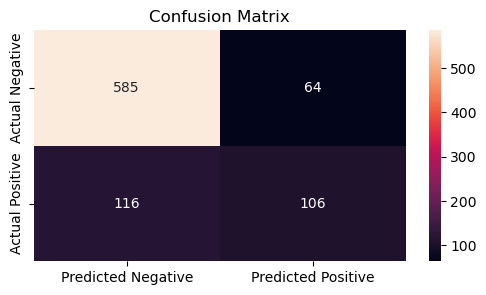

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       649
           1       0.62      0.48      0.54       222

    accuracy                           0.79       871
   macro avg       0.73      0.69      0.70       871
weighted avg       0.78      0.79      0.78       871



In [35]:
# Apply the Naive Bayes model
naive_bayes = GaussianNB() # Using GaussianNB as it had the best performance compared with the other NB models

# Train the model
naive_bayes.fit(X_train, y_train)

# Evaluate the model on training data
train_pred_nb = naive_bayes.predict(X_train)
train_accuracy_nb = accuracy_score(y_train, train_pred_nb)

#Evaluate the model on testing data
test_pred_nb = naive_bayes.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, test_pred_nb)

# Print accuracy scores
print('Training Accuracy:', train_accuracy_nb)
print('Testing Accuracy:', test_accuracy_nb)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred_nb)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['Predicted Negative', 'Predicted Positive'],
           yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, test_pred_nb)
print("Classification report:\n", report)

### Parameter Tuning - GridSearchCV

In [36]:
# Since Logistic Regression shows the best performance, it has been selected for further parameter tuning to enhance its performance
# Set up dictionary with the LR parameter to test
lr_params = {
    'penalty': ['l1','l2'],
    'C': [0.1, 1, 10, 100]
}

In [37]:
# Create a GridSearchCV instance
lr_gs = GridSearchCV(logreg, lr_params, scoring='accuracy', cv=8) # After few iterations, cv=8 gets the best accuracy score

# Fit the GridSearch to the training data
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [38]:
# Get the best hyperparameters
best_params_lr = lr_gs.best_params_
best_params_lr

{'C': 1, 'penalty': 'l2'}

In [39]:
# Get the best model
best_model = lr_gs.best_estimator_

# Make predictions on the test set using the best model
y_pred_lr_gs = best_model.predict(X_test)

# Evaluate the best model
accuracy_lr_gs = accuracy_score(y_test, y_pred_lr_gs)
accuracy_lr_gs

0.8025258323765786

In [40]:
# Compare the accuracy score after parameter tuning with the initial LR model accuracy score
accuracy_lr_gs == test_accuracy_lr

True

There is no observed difference in the accuracy of the logistic regression model even after hyperparameter tuning. This suggests that the model may have converged to an optimal solution. This stability indicates that the selected hyperparameters were close to the best settings, and further adjustments did not significantly impact the model's predictive accuracy.

### Model Interpretation - LIME

In [41]:
# Import the required libraries
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, # Training data to be explained
                                                  feature_names = dv.feature_names_, # List of feature names
                                                  class_names = ['Default-No', 'Default-Yes'], # Class labels for binary classification
                                                  feature_selection = "lasso_path", # Feature selection method
                                                  discretize_continuous=True, # Option to discretize continuous features
                                                  discretizer="quartile", # Method used for discretization
                                                  categorical_features = categorical, # List of indices for categorical features
                                                  verbose=True, # Enable verbose mode for explanation
                                                  mode='classification') # Mode specifies classification or regression problem

In [42]:
np.set_printoptions(suppress=True, precision=2) # Set format to display values without scientific notation
# np.set_printoptions(suppress=False, precision=8) # Reset format to display scientific notation

In [43]:
# Print X sample features
X_test[0]

array([  32.,  970.,    0.,    0.,   45.,    0.,    0.,    1.,    0.,
          0.,  161.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,
          0.,    0., 1564.,    0.,    1.,    7.,   48.])

In [44]:
# Print Y target
y_test.iloc[0]

1

Intercept 0.5859677407332629
Prediction_local [0.28]
Right: 0.2653990496620243


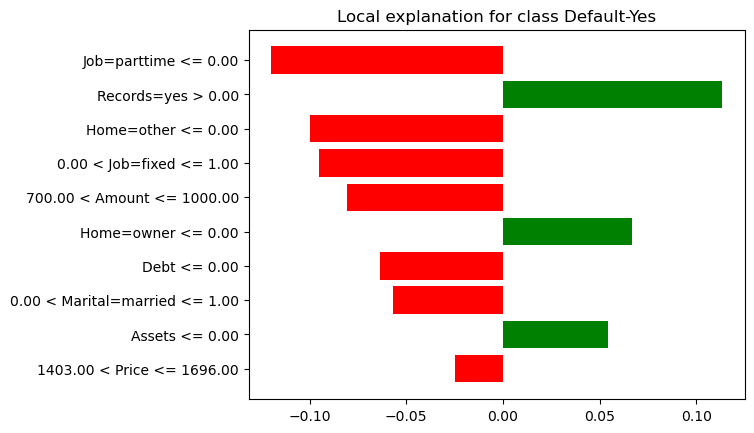

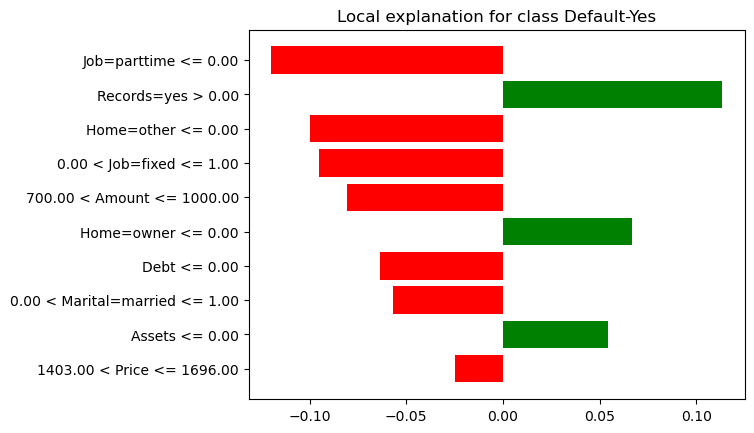

In [45]:
# Explain the first observation
exp = explainer.explain_instance(X_test[0], logreg.predict_proba)
exp.as_pyplot_figure()

In [46]:
exp = explainer.explain_instance(X_test[0], logreg.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.5118186814787088
Prediction_local [0.25]
Right: 0.2653990496620243


End of analysis.